# Python functions are objects themselves

You can reference python functions as objects

In [1]:
states = ['   Alabama ', 'Georgia!', 'Georgia', 'georgia', 
          'FlOrIda', 'south  carolina##', 'West virginia?']

In [2]:
import re  # package for regular expressions

# here is a function that applies a series of operations to clean up the strings

def clean_strings1(strings):
    result = []
    for value in strings:
        value = value.strip()  # strip whitespace
        value = re.sub('[!#?]', '', value)  # substitutes the characters !, #, ? with ''
        value = value.title()  # title case
        result.append(value)
    return result

In [3]:
clean_strings1(states)  # when we apply the function to the list, it cleans up the messy text

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South  Carolina',
 'West Virginia']

In [4]:
# we define a new function called remove_punctuation
def remove_punctuation(value):
    return re.sub('[!#?]', '', value)

In [5]:
# this is a list of functions 
clean_ops = [str.strip, remove_punctuation, str.title]

In [6]:
# just to demonstrate what these functions do...
str.strip('    alabama    ')

'alabama'

In [7]:
# the function clean strings takes two arguments:
# a list of strings
# a list of functions
def clean_strings2(strings, ops):
    result = []
    for value in strings:            # we loop over each string
        for function in ops:         # for each string, we loop over the functions listed in ops
            value = function(value)  # we update the value each time
        result.append(value)         # we append the list results with the value
    return result

In [8]:
clean_strings2(states, clean_ops)

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South  Carolina',
 'West Virginia']

In [9]:
clean_strings2(states, [str.strip, remove_punctuation, str.upper, lambda x: re.sub('  ',' ', x)])  
# I can provide a different list of functions

['ALABAMA',
 'GEORGIA',
 'GEORGIA',
 'GEORGIA',
 'FLORIDA',
 'SOUTH CAROLINA',
 'WEST VIRGINIA']

In [10]:
# the python function map() takes in an function name as an argument and applies it to a list

map(str.strip, states)  # map returns a map object

In [11]:
# to see the contents of the map object, you can put it into a list:
# map only allows you to specify one function
list(map(str.strip, states))

['Alabama',
 'Georgia!',
 'Georgia',
 'georgia',
 'FlOrIda',
 'south  carolina##',
 'West virginia?']

# lambda functions

In one of the later examples, I created a lambda function

A lambda function allows you to create and use a new short function without having to formally define it.

In [12]:
import re
states = ['   Alabama ', 'Georgia!', 'Georgia', 'georgia', 
          'FlOrIda', 'south  carolina##', 'West virginia?']

In [13]:
# I could define a function that replaces  two spaces with one space:
def replace_space(x):
    return(re.sub('  ', ' ', x))

In [14]:
# and then apply it to the strings:
list(map(replace_space, states))

['  Alabama ',
 'Georgia!',
 'Georgia',
 'georgia',
 'FlOrIda',
 'south carolina##',
 'West virginia?']

In [15]:
# however, because the code for the function is so short, it might be easier to just create
# a quick function without a formal name. These 'anonymous' functions are also known as lambda functions

list(map(lambda x: re.sub('  ',' ', x), states))

['  Alabama ',
 'Georgia!',
 'Georgia',
 'georgia',
 'FlOrIda',
 'south carolina##',
 'West virginia?']

In [16]:
list(map(lambda string: string.title(), states))

['   Alabama ',
 'Georgia!',
 'Georgia',
 'Georgia',
 'Florida',
 'South  Carolina##',
 'West Virginia?']

In [17]:
# a slightly more complex example

list(map(lambda x: re.sub('[?#!]','', x.title().strip()) , states))

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South  Carolina',
 'West Virginia']

lambda functions are written in the form:

`lambda argument1, argument2, etc: expression to return`

In [18]:
# lambda functions can accept multiple arguments
# if you use it with map, you'll need to provide a list for each argument
list(map(lambda x, y: x + y, [1,2,3], [100,200,300]))

[101, 202, 303]

# Linear Algebra with NumPy

In [19]:
import numpy as np

In [20]:
x = np.array([[1,2],[3,4]])
print(x)

[[1 2]
 [3 4]]


In [21]:
y = np.arange(1,5).reshape(2,2)
print(y)

[[1 2]
 [3 4]]


In [22]:
x * x  # asterisk does elementwise multiplication (similar to R)

array([[ 1,  4],
       [ 9, 16]])

In [23]:
x @ x # @ sign does matrix multiplication, equivalent to R's %*%

array([[ 7, 10],
       [15, 22]])

In [24]:
np.dot(x, x)  # matrix multiplication can also be done via np.dot()

array([[ 7, 10],
       [15, 22]])

In [25]:
x.dot(x)

array([[ 7, 10],
       [15, 22]])

In [26]:
x @ x.T

array([[ 5, 11],
       [11, 25]])

## simple linear regression example

If we want to estimate the coefficients of a linear regression fit 

$$\hat{y} = \beta_0 + \beta_1 x$$

This can be achieved via linear algebra.

We present x as a matrix: one row for each observation, and a column of 1s to go with $\beta_0$ and the next column consists of values of x.

Y is a column matrix of values.

The coefficient estimates that minimize the sum of squares for linear regression is

$$\hat{\beta} = (x^Tx)^{-1} x^T y$$

In [27]:
x = np.array([[1,1,1,1],[1,2,3,4]]).T
y = np.array([2,6,4,8]).reshape(4,1)

In [28]:
x

array([[1, 1],
       [1, 2],
       [1, 3],
       [1, 4]])

In [29]:
y

array([[2],
       [6],
       [4],
       [8]])

In [30]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

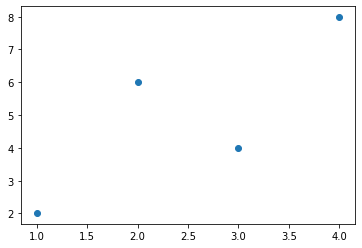

In [31]:
plt.scatter(x[:,1],y)
plt.show

The coefficient estimates that minimize the sum of squares for linear regression is

$$\hat{\beta} = (x^Tx)^{-1} x^T y$$

In [32]:
np.linalg.inv(x.T @ x) @ x.T @ y

array([[1. ],
       [1.6]])

(matches the results from R)

## other linear algebra functions

In [33]:
xtx = x.T @ x
print(xtx)

[[ 4 10]
 [10 30]]


In [34]:
np.linalg.inv(xtx)

array([[ 1.5, -0.5],
       [-0.5,  0.2]])

In [35]:
xtx @ np.linalg.inv(xtx)

array([[1., 0.],
       [0., 1.]])

In [36]:
a = np.linalg.cholesky(xtx)  # cholesky decomposition of a square matrix 
# produces a lower triangular matrix, that when multiplied by its transpose produces the orignal
print(a)

[[2.         0.        ]
 [5.         2.23606798]]


In [37]:
a @ a.T  # recreate the original matrix

array([[ 4., 10.],
       [10., 30.]])

In [38]:
q,r = np.linalg.qr(xtx)  # qr decomposition

In [39]:
q # q is orthogonal, shown later

array([[-0.37139068, -0.92847669],
       [-0.92847669,  0.37139068]])

In [40]:
r # r is upper triangular

array([[-10.77032961, -31.56820749],
       [  0.        ,   1.85695338]])

In [41]:
q @ r  #q times r is the original matrix

array([[ 4., 10.],
       [10., 30.]])

In [42]:
q @ q.T  # q is orthogonal, so q times its transpose gives the identity matrix

array([[ 1.00000000e+00, -2.36019294e-17],
       [-2.36019294e-17,  1.00000000e+00]])

In [43]:
val, vec = np.linalg.eig(xtx)  # eigen values and eigen vectors of the matrix

In [44]:
print(val)

[ 0.59878053 33.40121947]


In [45]:
print(vec)

[[-0.94673755 -0.32200622]
 [ 0.32200622 -0.94673755]]


In [46]:
xtx @ vec[:,0]  # the matrix times its eigen vector produces a vector, that is 

array([-0.56688802,  0.19281106])

In [47]:
vec[:,0] * val[0]  # equivalent to the eigenvector multiplied by a scalar

array([-0.56688802,  0.19281106])